### Imports

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

### Funções auxiliares

In [ ]:
# Board size (N=8)
N = 8

# Total de pares de rainhas (N*(N-1)/2)
MAX_NON_ATTACKING_PAIRS = int(N * (N - 1) / 2)

def cost_h(x):
    attacks = 0
    for i in range(N):
        for j in range(i + 1, N):
            if x[i] == x[j]:
                attacks += 1

            if abs(x[i] - x[j]) == abs(i - j):
                attacks += 1
    return attacks

def fitness_f(x):
    return MAX_NON_ATTACKING_PAIRS - cost_h(x)


### Tempera simulada

In [ ]:
class SimulatedAnnealing:
    def __init__(self, N, cost_func, T_initial, max_iter, decay_rate):
        self.N = N  # Tamanho do tabuleiro (N=8)
        self.cost_func = cost_func
        self.T_initial = T_initial
        self.T_current = T_initial
        self.max_iter = max_iter  
        self.decay_rate = decay_rate  
        self.cost_history = []
        self.T_history = []

        self.x_opt = np.random.randint(0, self.N, self.N)
        self.cost_opt = self.cost_func(self.x_opt)
        self.cost_history.append(self.cost_opt)
        self.T_history.append(self.T_current)

    def _perturb(self):
        x_cand = np.copy(self.x_opt)

        col_to_change = random.randint(0, self.N - 1)

        new_row = random.randint(0, self.N - 1)

        x_cand[col_to_change] = new_row

        return x_cand

    def _schedule(self, i):
        self.T_current = self.T_initial * (self.decay_rate ** i)

        if self.T_current < 1e-6:
            self.T_current = 1e-6

    def search(self):
        it = 0
        while it < self.max_iter and self.cost_opt > 0: 
            x_cand = self._perturb()
            cost_cand = self.cost_func(x_cand)

            delta_cost = cost_cand - self.cost_opt

            if delta_cost <= 0:
                accept = True
            else:
                accept_prob = np.exp(-delta_cost / self.T_current)
                if random.random() < accept_prob:
                    accept = True
                else:
                    accept = False

            if accept:
                self.x_opt = x_cand
                self.cost_opt = cost_cand

            self._schedule(it)

            self.cost_history.append(self.cost_opt)
            self.T_history.append(self.T_current)
            it += 1

        return self.x_opt, self.cost_opt


### Função auxiliar

In [ ]:
def plot_queen_solution(x, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(title)
    
    for i in range(N):
        for j in range(N):
            if (i + j) % 2 == 0:
                color = 'lightgray'
            else:
                color = 'white'
            ax.add_patch(plt.Rectangle((i, j), 1, 1, facecolor=color, edgecolor='black'))

    for col in range(N):
        row = x[col]
        ax.text(col + 0.5, row + 0.5, '♕', fontsize=30, ha='center', va='center', color='black')
    
    ax.set_xticks(np.arange(N) + 0.5)
    ax.set_xticklabels(np.arange(1, N + 1))
    ax.set_yticks(np.arange(N) + 0.5)
    ax.set_yticklabels(np.arange(1, N + 1)[::-1]) 
    
    ax.set_xlim(0, N)
    ax.set_ylim(0, N)
    ax.set_aspect('equal', adjustable='box')
    plt.gca().invert_yaxis() 
    plt.grid(False)
    plt.show()

### Execução do Algoritmo e Visualização dos Resultados

--- Resultados Têmpera Simulada (8-Rainhas) ---
Solução final (linhas por coluna): [1 3 6 0 7 4 2 5]
Custo final (Nº de ataques): 1
Função de Aptidão (28 - ataques): 27
Iterações realizadas: 1000


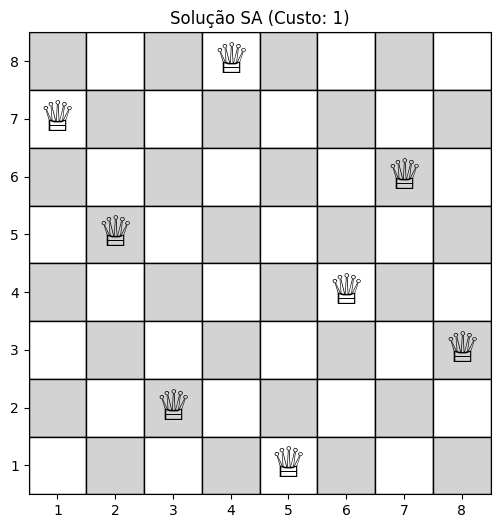

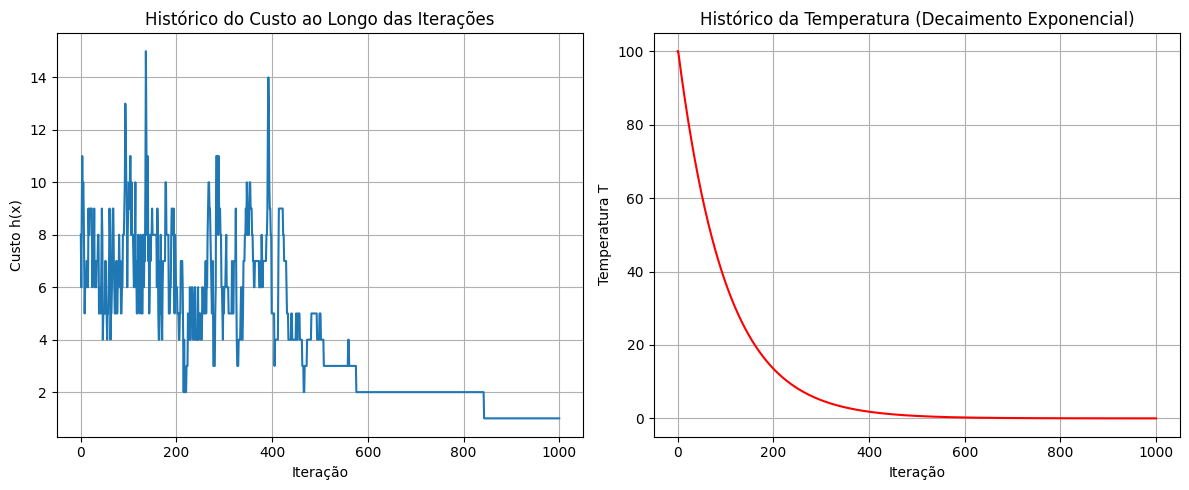

In [ ]:

T_INITIAL = 100.0
MAX_ITERATIONS = 1000
DECAY_RATE = 0.99

sa = SimulatedAnnealing(N, cost_h, T_INITIAL, MAX_ITERATIONS, DECAY_RATE)
x_solution, cost_solution = sa.search()

print(f"--- Resultados Têmpera Simulada (8-Rainhas) ---")
print(f"Solução final (linhas por coluna): {x_solution}")
print(f"Custo final (Nº de ataques): {cost_solution}")
print(f"Função de Aptidão (28 - ataques): {MAX_NON_ATTACKING_PAIRS - cost_solution}")
print(f"Iterações realizadas: {len(sa.cost_history) - 1}")

plot_queen_solution(x_solution, f"Solução SA (Custo: {cost_solution})")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sa.cost_history, label='Custo (Nº de Ataques)')
plt.title('Histórico do Custo ao Longo das Iterações')
plt.xlabel('Iteração')
plt.ylabel('Custo h(x)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sa.T_history, label='Temperatura (T)', color='red')
plt.title('Histórico da Temperatura (Decaimento Exponencial)')
plt.xlabel('Iteração')
plt.ylabel('Temperatura T')
plt.grid(True)

plt.tight_layout()
plt.show()


### Busca das 92 Soluções Distintas

In [ ]:
T_INITIAL_92 = 100.0
MAX_ITERATIONS_92 = 1000
DECAY_RATE_92 = 0.99
MAX_ROUNDS = 10000

unique_solutions = set()
rounds = 0

print(f"\n--- Buscando Soluções Únicas (Limite de {MAX_ROUNDS} rodadas) ---")

while len(unique_solutions) < 92 and rounds < MAX_ROUNDS:
    sa_multi = SimulatedAnnealing(N, cost_h, T_INITIAL_92, MAX_ITERATIONS_92, DECAY_RATE_92)
    x_solution, cost_solution = sa_multi.search()
    
    if cost_solution == 0:
        sol_tuple = tuple(x_solution) 
        if sol_tuple not in unique_solutions:
            unique_solutions.add(sol_tuple)
            print(f"Rodada {rounds+1}: Nova solução ótima encontrada! Total: {len(unique_solutions)}/92. Solução: {sol_tuple}")
    
    if rounds > 0 and rounds % 500 == 0:
        print(f"Progresso: {rounds}/{MAX_ROUNDS} rodadas executadas. Soluções únicas encontradas: {len(unique_solutions)}/92")

    rounds += 1


print(f"\n--- Resumo Final da Busca de Soluções Únicas ---")
print(f"Total de rodadas realizadas: {rounds}")
print(f"Total de soluções ótimas únicas encontradas: {len(unique_solutions)}/92")

if len(unique_solutions) == 92:
    print("Todas as 92 soluções únicas foram encontradas!")
else:
    print(f"A busca parou após {rounds} rodadas. Para encontrar todas as 92, o limite de rodadas deve ser aumentado ({MAX_ROUNDS}).")


--- Buscando Soluções Únicas (Limite de 10000 rodadas) ---
Rodada 1: Nova solução ótima encontrada! Total: 1/92. Solução: (np.int32(3), np.int32(5), np.int32(7), np.int32(1), np.int32(6), np.int32(0), np.int32(2), np.int32(4))
Rodada 2: Nova solução ótima encontrada! Total: 2/92. Solução: (np.int32(4), np.int32(2), np.int32(0), np.int32(5), np.int32(7), np.int32(1), np.int32(3), np.int32(6))
Rodada 5: Nova solução ótima encontrada! Total: 3/92. Solução: (np.int32(4), np.int32(6), np.int32(0), np.int32(3), np.int32(1), np.int32(7), np.int32(5), np.int32(2))
Rodada 8: Nova solução ótima encontrada! Total: 4/92. Solução: (np.int32(2), np.int32(5), np.int32(1), np.int32(4), np.int32(7), np.int32(0), np.int32(6), np.int32(3))
Rodada 10: Nova solução ótima encontrada! Total: 5/92. Solução: (np.int32(1), np.int32(5), np.int32(0), np.int32(6), np.int32(3), np.int32(7), np.int32(2), np.int32(4))
Rodada 11: Nova solução ótima encontrada! Total: 6/92. Solução: (np.int32(6), np.int32(0), np.int32